/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


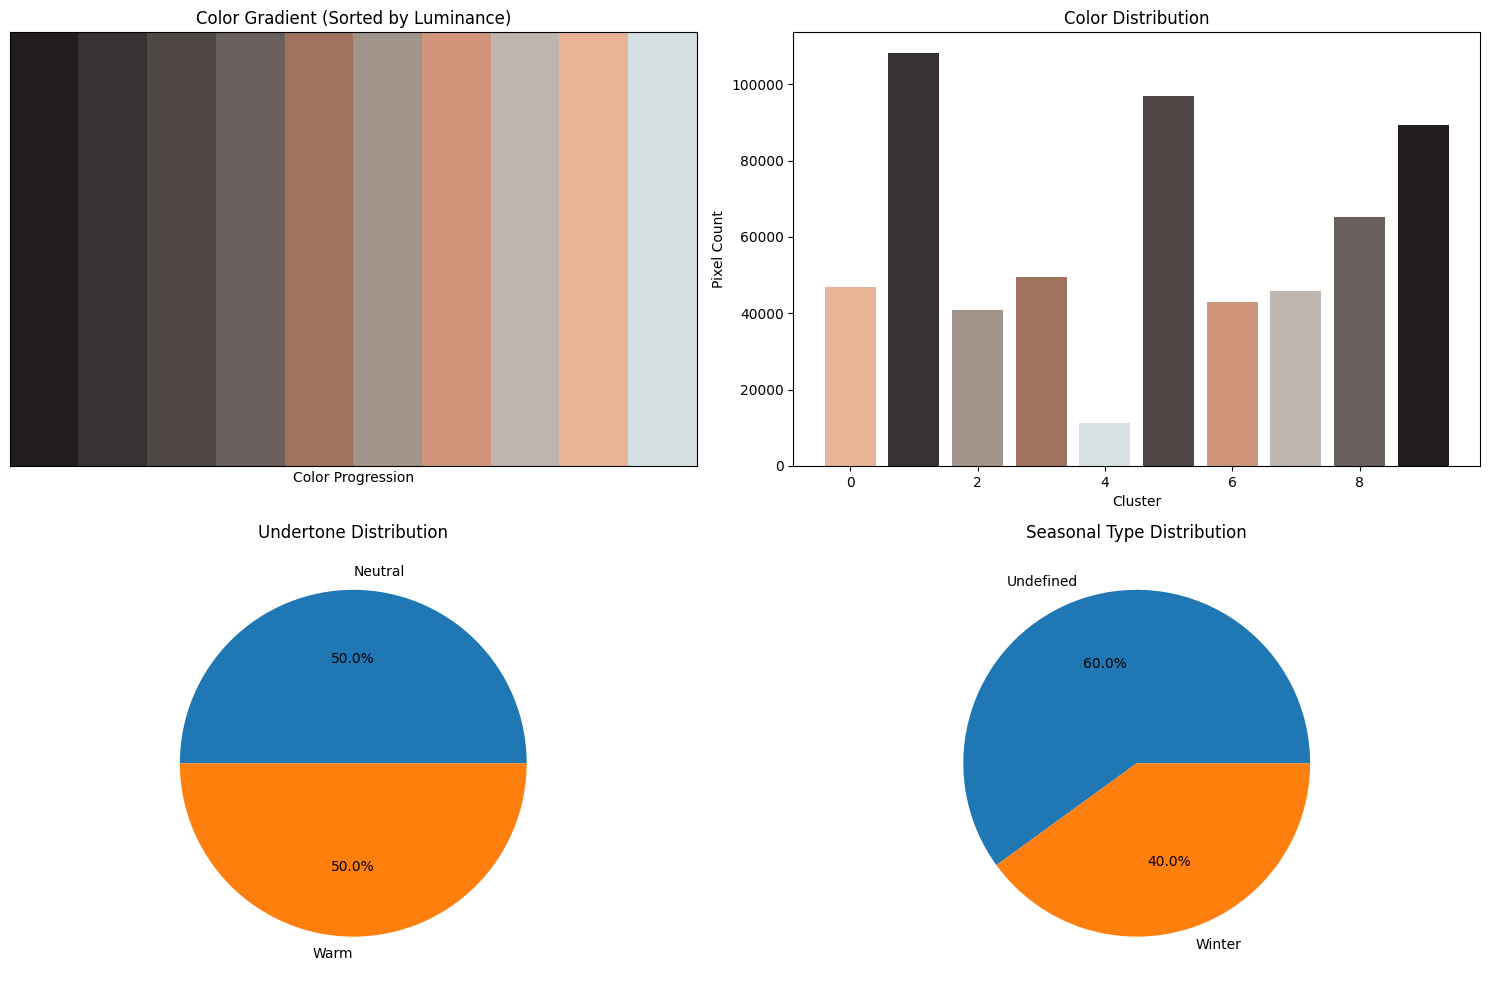

(array([[232.81684404, 179.14242146, 151.2550065 ],
        [ 56.39258329,  50.61123224,  50.13707249],
        [161.76213056, 148.06510577, 138.44198216],
        [159.66418273, 114.8403329 ,  94.65110157],
        [213.9649401 , 224.58773784, 227.47947498],
        [ 79.36101907,  72.43944133,  71.07109308],
        [208.24316215, 149.80274909, 122.8746395 ],
        [189.78405149, 181.83050071, 174.17050289],
        [105.50647599,  95.72964853,  92.78961083],
        [ 34.40065376,  28.55391866,  28.28026733]]),
 ['Warm',
  'Neutral',
  'Warm',
  'Warm',
  'Neutral',
  'Neutral',
  'Warm',
  'Warm',
  'Neutral',
  'Neutral'],
 ['Undefined',
  'Winter',
  'Undefined',
  'Undefined',
  'Undefined',
  'Winter',
  'Undefined',
  'Undefined',
  'Winter',
  'Winter'])


Color Cluster Details:
Cluster 0:
  RGB Color: [232.81684404 179.14242146 151.2550065 ]
  Undertone: Warm
  Seasonal Type: Undefined
Cluster 1:
  RGB Color: [56.39258329 50.61123224 50.13707249]
  Undertone: Neutral
  Seasonal Type: Winter
Cluster 2:
  RGB Color: [161.76213056 148.06510577 138.44198216]
  Undertone: Warm
  Seasonal Type: Undefined
Cluster 3:
  RGB Color: [159.66418273 114.8403329   94.65110157]
  Undertone: Warm
  Seasonal Type: Undefined
Cluster 4:
  RGB Color: [213.9649401  224.58773784 227.47947498]
  Undertone: Neutral
  Seasonal Type: Undefined
Cluster 5:
  RGB Color: [79.36101907 72.43944133 71.07109308]
  Undertone: Neutral
  Seasonal Type: Winter
Cluster 6:
  RGB Color: [208.24316215 149.80274909 122.8746395 ]
  Undertone: Warm
  Seasonal Type: Undefined
Cluster 7:
  RGB Color: [189.78405149 181.83050071 174.17050289]
  Undertone: Warm
  Seasonal Type: Undefined
Cluster 8:
  RGB Color: [105.50647599  95.72964853  92.78961083]
  Undertone: Neutral
  Seasonal Ty

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import colorsys
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def rgb_to_hsv(rgb):
    """Convert RGB to HSV color space."""
    return colorsys.rgb_to_hsv(rgb[0]/255.0, rgb[1]/255.0, rgb[2]/255.0)

def classify_undertone(h, s, v):
    """
    Classify skin undertones based on HSV color space.
    This is a simplified approximation and should not be used for precise skin tone analysis.
    """
    # Warm tones: more yellow/orange hues
    # Cool tones: more blue/purple hues
    # Neutral: closer to middle of hue spectrum
    if 0.05 <= h <= 0.15:  # Warm orange-yellow range
        return 'Warm'
    elif 0.55 <= h <= 0.75:  # Cool blue-purple range
        return 'Cool'
    else:
        return 'Neutral'

def classify_seasonal_type(h, s, v):
    """
    Classify seasonal color types based on HSV values.
    This is a highly simplified approximation.
    """
    if 0.05 <= h <= 0.15 and s > 0.5 and v > 0.5:
        return 'Spring'
    elif 0.15 <= h <= 0.35 and s < 0.5 and v > 0.5:
        return 'Summer'
    elif 0.35 <= h <= 0.55 and s > 0.5 and v > 0.5:
        return 'Autumn'
    elif (h <= 0.05 or h >= 0.75) and s < 0.3 and v < 0.5:
        return 'Winter'
    else:
        return 'Undefined'

def analyze_image_colors(image_path):
    """
    Analyze colors in an image, create visualizations, and perform clustering.
    """
    # Open and process the image
    img = Image.open(image_path)
    img = img.convert('RGB')
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Reshape the image to be a list of pixels
    pixels = img_array.reshape(-1, 3)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(pixels)
    
    # Get cluster centers and labels
    colors = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # Convert RGB to HSV for further analysis
    hsv_colors = np.array([rgb_to_hsv(color) for color in colors])
    
    # Classify undertones and seasonal types
    undertones = [classify_undertone(h, s, v) for h, s, v in hsv_colors]
    seasonal_types = [classify_seasonal_type(h, s, v) for h, s, v in hsv_colors]
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # 1. Color Gradient Plot (Improved)
    plt.subplot(2, 2, 1)
    # Sort colors by luminance (brightness)
    luminance = np.dot(colors, [0.299, 0.587, 0.114])
    sorted_indices = np.argsort(luminance)
    sorted_colors = colors[sorted_indices] / 255.0
    
    # Create a gradient image
    gradient = np.linspace(0, 1, len(sorted_colors)).reshape(1, -1)
    plt.imshow(sorted_colors[np.newaxis, :], aspect='auto', extent=[0, 1, 0, 1])
    plt.title('Color Gradient (Sorted by Luminance)')
    plt.xlabel('Color Progression')
    plt.xticks([])
    plt.yticks([])
    
    # 2. Color Bar Plot
    plt.subplot(2, 2, 2)
    cluster_counts = np.unique(labels, return_counts=True)[1]
    plt.bar(range(len(colors)), cluster_counts, color=colors/255)
    plt.title('Color Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Pixel Count')
    
    # 3. Pie Chart of Undertones
    plt.subplot(2, 2, 3)
    undertone_counts = np.unique(undertones, return_counts=True)
    plt.pie(undertone_counts[1], labels=undertone_counts[0], autopct='%1.1f%%')
    plt.title('Undertone Distribution')
    
    # 4. Pie Chart of Seasonal Types
    plt.subplot(2, 2, 4)
    seasonal_counts = np.unique(seasonal_types, return_counts=True)
    plt.pie(seasonal_counts[1], labels=seasonal_counts[0], autopct='%1.1f%%')
    plt.title('Seasonal Type Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed color information
    print("\nColor Cluster Details:")
    for i, (color, undertone, season) in enumerate(zip(colors, undertones, seasonal_types)):
        print(f"Cluster {i}:")
        print(f"  RGB Color: {color}")
        print(f"  Undertone: {undertone}")
        print(f"  Seasonal Type: {season}")
    
    return colors, undertones, seasonal_types

# Example usage
# Replace 'path/to/your/image.jpg' with the actual path to your image
analyze_image_colors('./eeman.jpg')